In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings

In [20]:
df = pd.read_csv(r"C:\Users\Windows\Documents\apriori.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      4000 non-null   int64 
 1   product_id    4000 non-null   int64 
 2   product_name  4000 non-null   object
 3   status        4000 non-null   object
 4   order_date    4000 non-null   object
 5   state         4000 non-null   object
dtypes: int64(2), object(4)
memory usage: 187.6+ KB


In [21]:
df.sample(5)

,order_id,product_id,product_name,status,order_date,state
2129,17276,24877,Dickies Mens 3 Pair Industrial Strength Crew Sock,Complete,2023-12-09 03:29:00.000000 UTC,California
334,7713,11092,Bali Women's Power Shape Torset Bodysuit,Complete,2024-04-19 01:01:00.000000 UTC,Ohio
628,12803,18408,CW-X Unisex Adult Ventilator Compression Suppo...,Returned,2022-04-28 07:45:00.000000 UTC,Guangdong
3563,15648,22551,Savile Row Mens Claret Red Corduroy,Complete,2020-12-23 00:32:00.000000 UTC,Guangdong
3001,13781,19842,Moda Essentials Men's 3 Button Blazer Sportcoa...,Shipped,2021-03-04 02:25:00.000000 UTC,Cataluña


In [38]:
data = df.head(2000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      2000 non-null   int64 
 1   product_id    2000 non-null   int64 
 2   product_name  2000 non-null   object
 3   status        2000 non-null   object
 4   order_date    2000 non-null   object
 5   state         2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


In [39]:
data = data[data['status']!="Cancelled"]
data.shape

(1727, 6)

In [40]:
data['product_id'].nunique()

913

In [41]:
# Converting product_id to a string since we wont be performing any computation on this feature

data['product_id'] = data['product_id'].astype(str)
data.sample()


,order_id,product_id,product_name,status,order_date,state
104,4649,6641,Joie Women's Bismark Short,Processing,2023-10-07 03:12:00.000000 UTC,Paraná


In [42]:
data['uniqueTransaction'] = data['product_id']+ '_' + data['product_name']
data.head()

,order_id,product_id,product_name,status,order_date,state,uniqueTransaction
0,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Complete,2023-12-06 13:35:00.000000 UTC,Amazonas,26497_Tommy Hilfiger Men's Poplin Plaid Sleep ...
1,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Shipped,2021-01-30 13:35:00.000000 UTC,Amazonas,26497_Tommy Hilfiger Men's Poplin Plaid Sleep ...
3,6651,9565,Shadowline Petals 54 Coat (71280),Complete,2020-06-29 08:29:00.000000 UTC,Nordrhein-Westfalen,9565_Shadowline Petals 54 Coat (71280)
4,10098,14533,Satin Piping Maternity/Nursing Pajama Set,Processing,2022-04-02 14:45:00.000000 UTC,Minnesota,14533_Satin Piping Maternity/Nursing Pajama Set
5,10098,14533,Satin Piping Maternity/Nursing Pajama Set,Shipped,2020-11-14 14:45:00.000000 UTC,Minnesota,14533_Satin Piping Maternity/Nursing Pajama Set


In [43]:
# We can see he made purchases on 2 different days.
# All his purchases per day have the same uniqueTransaction

oneCustomerCheck = data[data['order_id'] == 18405].sort_values('order_date')
oneCustomerCheck

,order_id,product_id,product_name,status,order_date,state,uniqueTransaction
1,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Shipped,2021-01-30 13:35:00.000000 UTC,Amazonas,26497_Tommy Hilfiger Men's Poplin Plaid Sleep ...
0,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Complete,2023-12-06 13:35:00.000000 UTC,Amazonas,26497_Tommy Hilfiger Men's Poplin Plaid Sleep ...


In [44]:
basket = pd.crosstab(data['order_id'], data['product_name'])

basket.sample(5)


product_name,10 Deep - Mens Infield Hoody Hoodie In Black,10-Pack Hanes Over-the-Calf Tube 180/10 White 6-12,180s Men's Tec Fleece Ear Warmer,2 - Pk. of Guide Gear Soft Fit Lounge Pants 1 Red / 1 Green,2 Button Modern Fit Tuxedo,2 Pc polka Dot Babydoll With Ruffle Trim Padded Underwire Cups Adjustable Shoulder Straps,2(x)ist Men's Xtreme Range No Show Brief,2B Norah Sweetheart Peplum Dress,2B Paradise Breeze Staci Maxi,2B Solid Peplum Top,...,adidas Women's Response DS Short-Sleeve Tee W Short-Sleeve Top,adidas Women's Response Ts Jacket,allen allen Women's Long Sleeve Hoodie With Coverstitch,b.tempt'd by Wacoal Women's Supernatural Thong,b.tempt'd by Wacoal Women's Sweet Seduction Thong,ecko unltd. Men's Trademark Hoody,neff Juniors Perf,neff Men's Cookie Fashion Hoodie,neff Men's Daily Shell Hood,tokidoki Bejeweled Women's Hoodie
order_id,,,,,,,,,,,,,,,,,,,,,
7713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
basket = basket.apply(pd.to_numeric, errors='coerce')
# Replace NaN values with 0 (if needed)
basket.fillna(0, inplace=True)

basket_sets = basket.applymap(lambda x: 1 if x > 1 else 0)
basket_sets.sample(5)

product_name,10 Deep - Mens Infield Hoody Hoodie In Black,10-Pack Hanes Over-the-Calf Tube 180/10 White 6-12,180s Men's Tec Fleece Ear Warmer,2 - Pk. of Guide Gear Soft Fit Lounge Pants 1 Red / 1 Green,2 Button Modern Fit Tuxedo,2 Pc polka Dot Babydoll With Ruffle Trim Padded Underwire Cups Adjustable Shoulder Straps,2(x)ist Men's Xtreme Range No Show Brief,2B Norah Sweetheart Peplum Dress,2B Paradise Breeze Staci Maxi,2B Solid Peplum Top,...,adidas Women's Response DS Short-Sleeve Tee W Short-Sleeve Top,adidas Women's Response Ts Jacket,allen allen Women's Long Sleeve Hoodie With Coverstitch,b.tempt'd by Wacoal Women's Supernatural Thong,b.tempt'd by Wacoal Women's Sweet Seduction Thong,ecko unltd. Men's Trademark Hoody,neff Juniors Perf,neff Men's Cookie Fashion Hoodie,neff Men's Daily Shell Hood,tokidoki Bejeweled Women's Hoodie
order_id,,,,,,,,,,,,,,,,,,,,,
5611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Now you can use the boolean DataFrame with the apriori algorithm

basket_sets = pd.DataFrame(basket_sets)
my_frequent_items = apriori(basket_sets, min_support=0.0001, use_colnames=True)

my_frequent_items

C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.001116,(10-Pack Hanes Over-the-Calf Tube 180/10 White...
1,0.001116,(180s Men's Tec Fleece Ear Warmer)
2,0.001116,(2 Button Modern Fit Tuxedo)
3,0.001116,(2(x)ist Men's Xtreme Range No Show Brief)
4,0.001116,(2B Solid Peplum Top)
...,...,...
517,0.001116,(Louis Raphael Men's Poly Rayon Gabardine Soli...
518,0.001116,(Men's New Liquid Metallic Football Bikini Swi...
519,0.001116,(Men's New Liquid Metallic Football Bikini Swi...
520,0.001116,(Rufskin - Parati -Rufskin Parati- Mesh Sunga ...


In [82]:
rules = association_rules(my_frequent_items, metric="lift")
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,(American Apparel Unisex Sleeveless Zip Hoodie),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
1,(American Apparel Unisex Sleeveless Zip Hoodie),(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
2,(C-in2 Men's Core Lo No Show Army Trunk),(Harbor Bay Big & Tall Color Crewneck T-Shirts...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
3,(Harbor Bay Big & Tall Color Crewneck T-Shirts...,(C-in2 Men's Core Lo No Show Army Trunk),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
4,(Diesel - Mens Viker 0880F Denim Jeans),(Quiksilver Distortion Denim Pant - Men's),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
5,(Quiksilver Distortion Denim Pant - Men's),(Diesel - Mens Viker 0880F Denim Jeans),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
6,(G-Star Raw - Mens Arc 3D Slim Fit Jeans in Da...,(Diesel Men's Thavar Skinny Stone Wash Straigh...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
7,(Diesel Men's Thavar Skinny Stone Wash Straigh...,(G-Star Raw - Mens Arc 3D Slim Fit Jeans in Da...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
8,(Haggar Men's Mynx Gabardine Hidden Expandable...,(Dockers Men's Easy D3 Classic Fit Pleated Kha...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
9,(Dockers Men's Easy D3 Classic Fit Pleated Kha...,(Haggar Men's Mynx Gabardine Hidden Expandable...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0


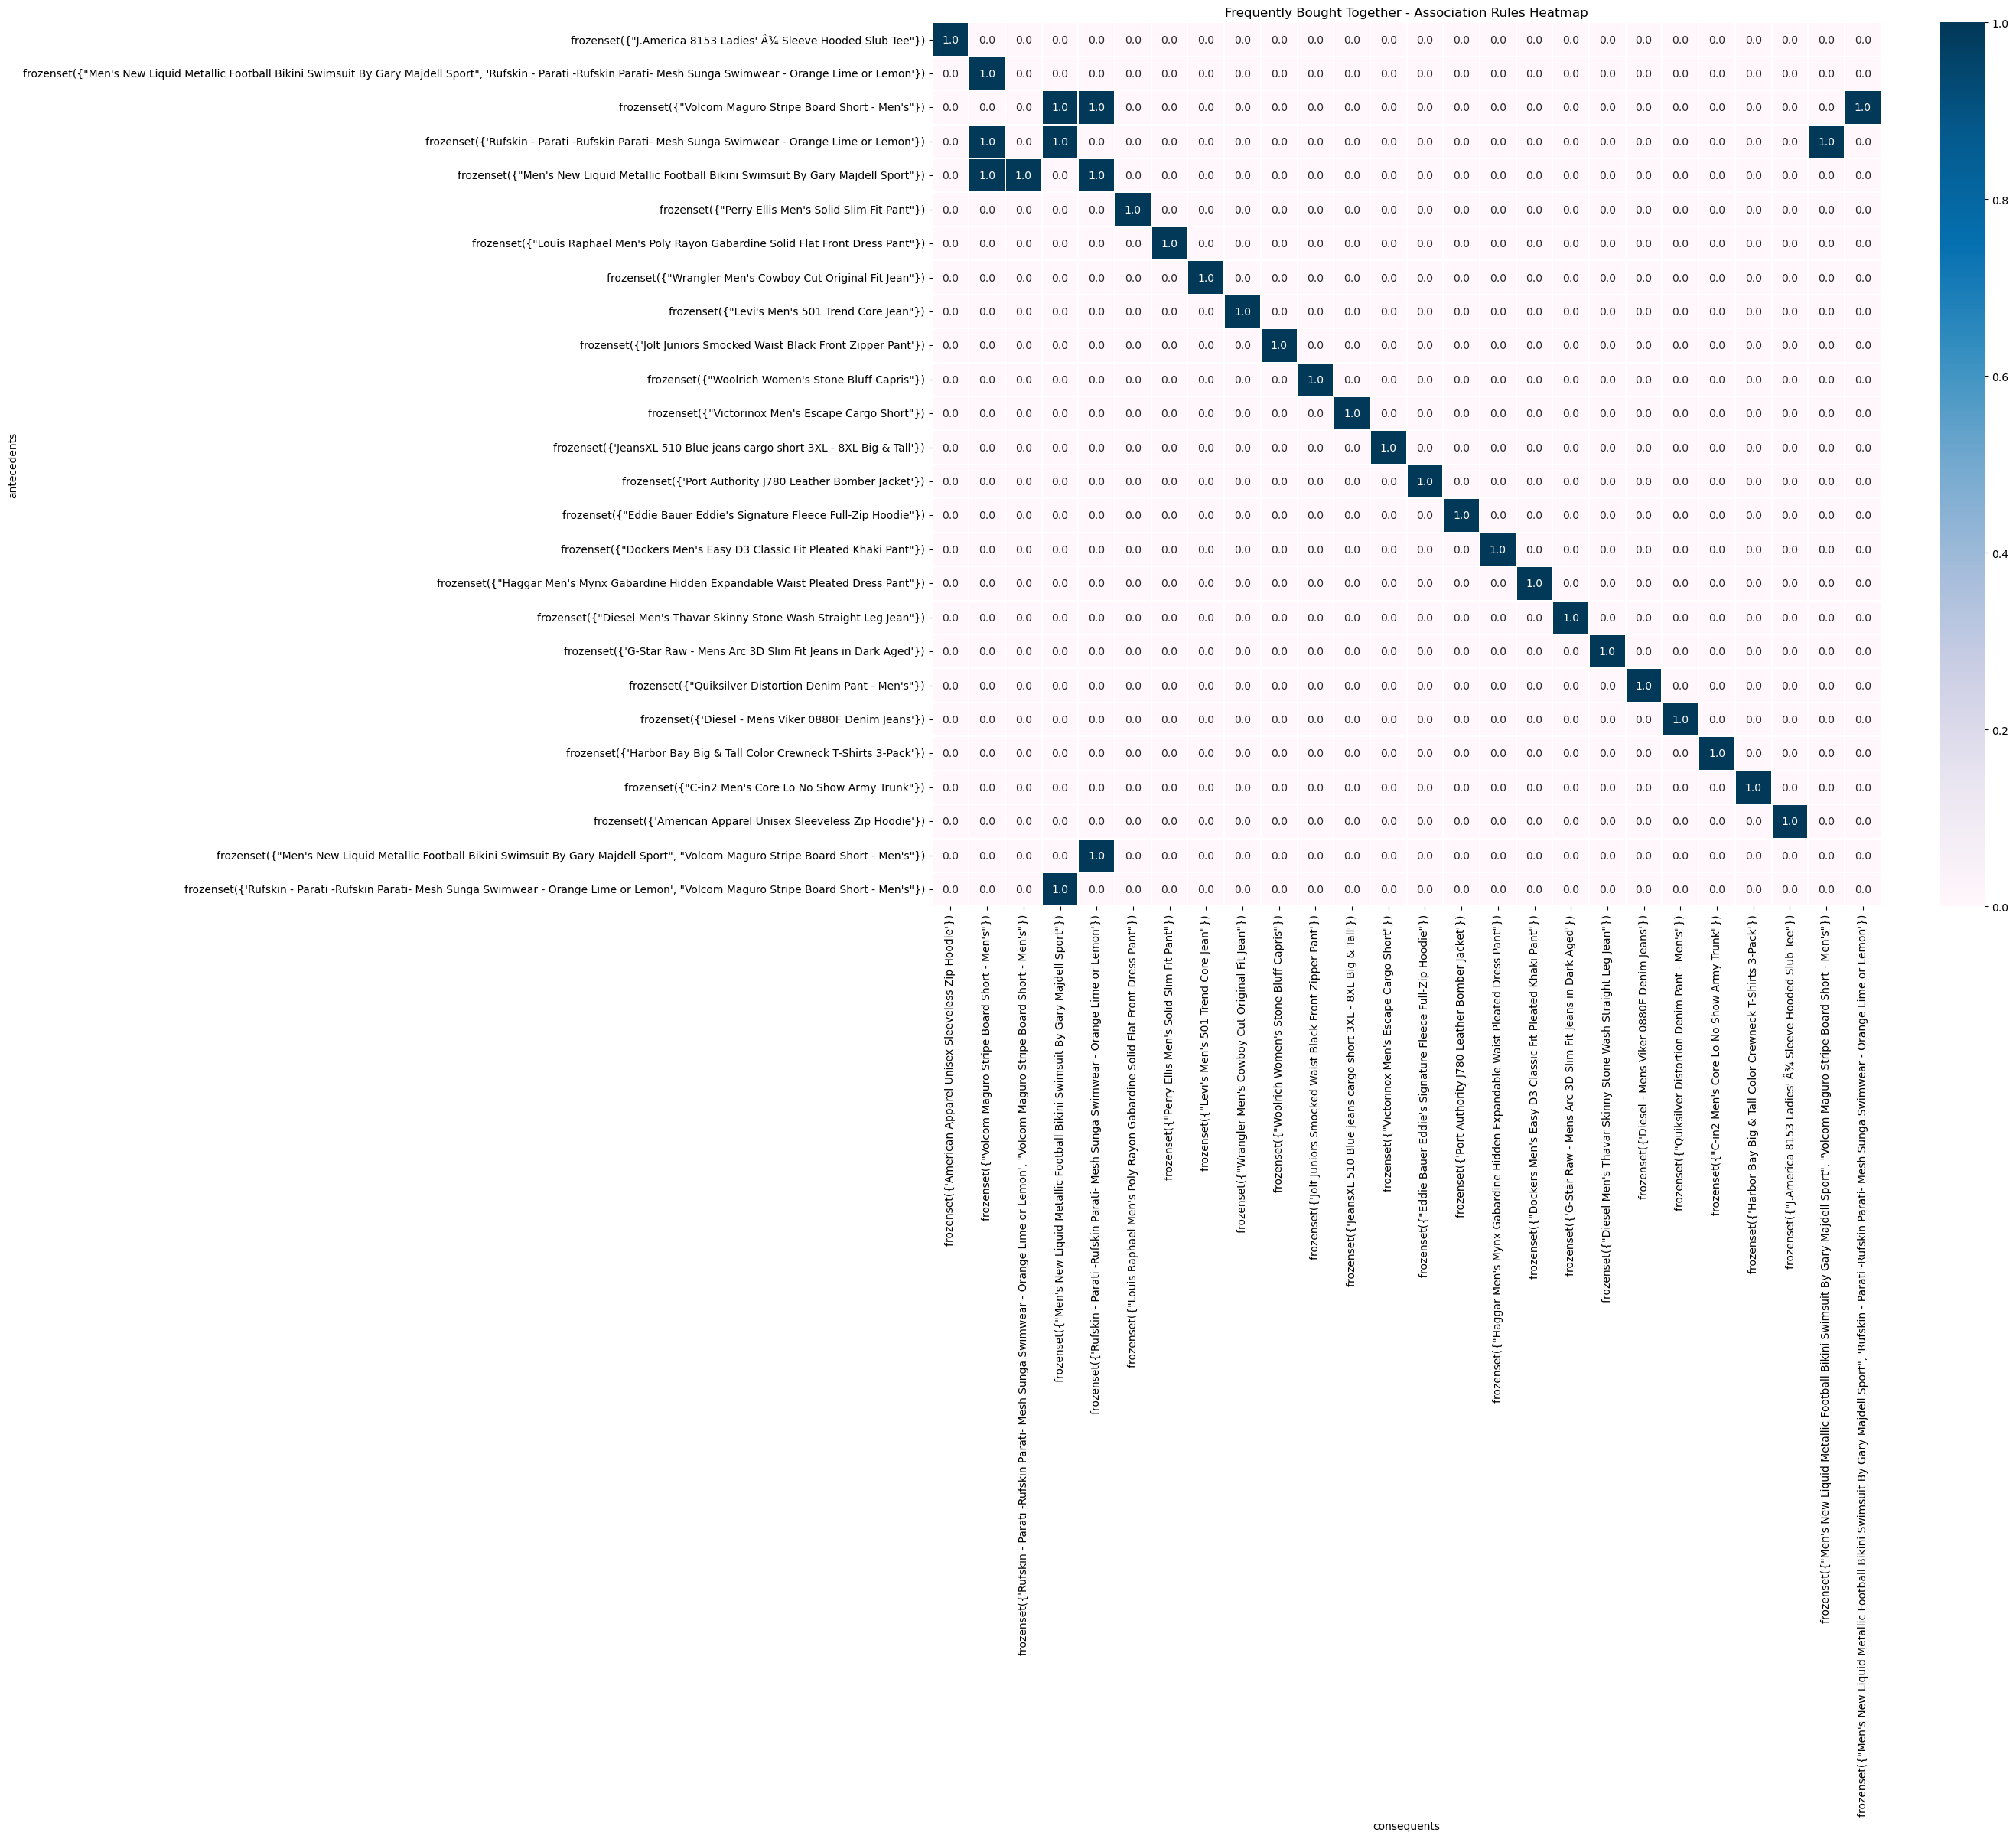

In [73]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.10) # Add vmin=0 to set the minimum value for the colormap
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

# I used Zhang's metric in my viz because it combines support, confidence, and lift into a single measure.
# A negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.
# It implies that despite a certain level of confidence, the occurrence of the antecedent reduces the overall support or likelihood of the consequent, leading to a negative impact or anti-association.
# In practical terms, a negative Zhang's metric might suggest scenarios where the presence of one item in a transaction makes the occurrence of another item less likely than expected.
# A positive Zhang's metric would the opposite

In [49]:
# Taking pairs with positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,(American Apparel Unisex Sleeveless Zip Hoodie),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
1,(American Apparel Unisex Sleeveless Zip Hoodie),(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
2,(C-in2 Men's Core Lo No Show Army Trunk),(Harbor Bay Big & Tall Color Crewneck T-Shirts...,0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
3,(Harbor Bay Big & Tall Color Crewneck T-Shirts...,(C-in2 Men's Core Lo No Show Army Trunk),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0
4,(Diesel - Mens Viker 0880F Denim Jeans),(Quiksilver Distortion Denim Pant - Men's),0.001116,0.001116,0.001116,1.0,896.0,0.001115,inf,1.0


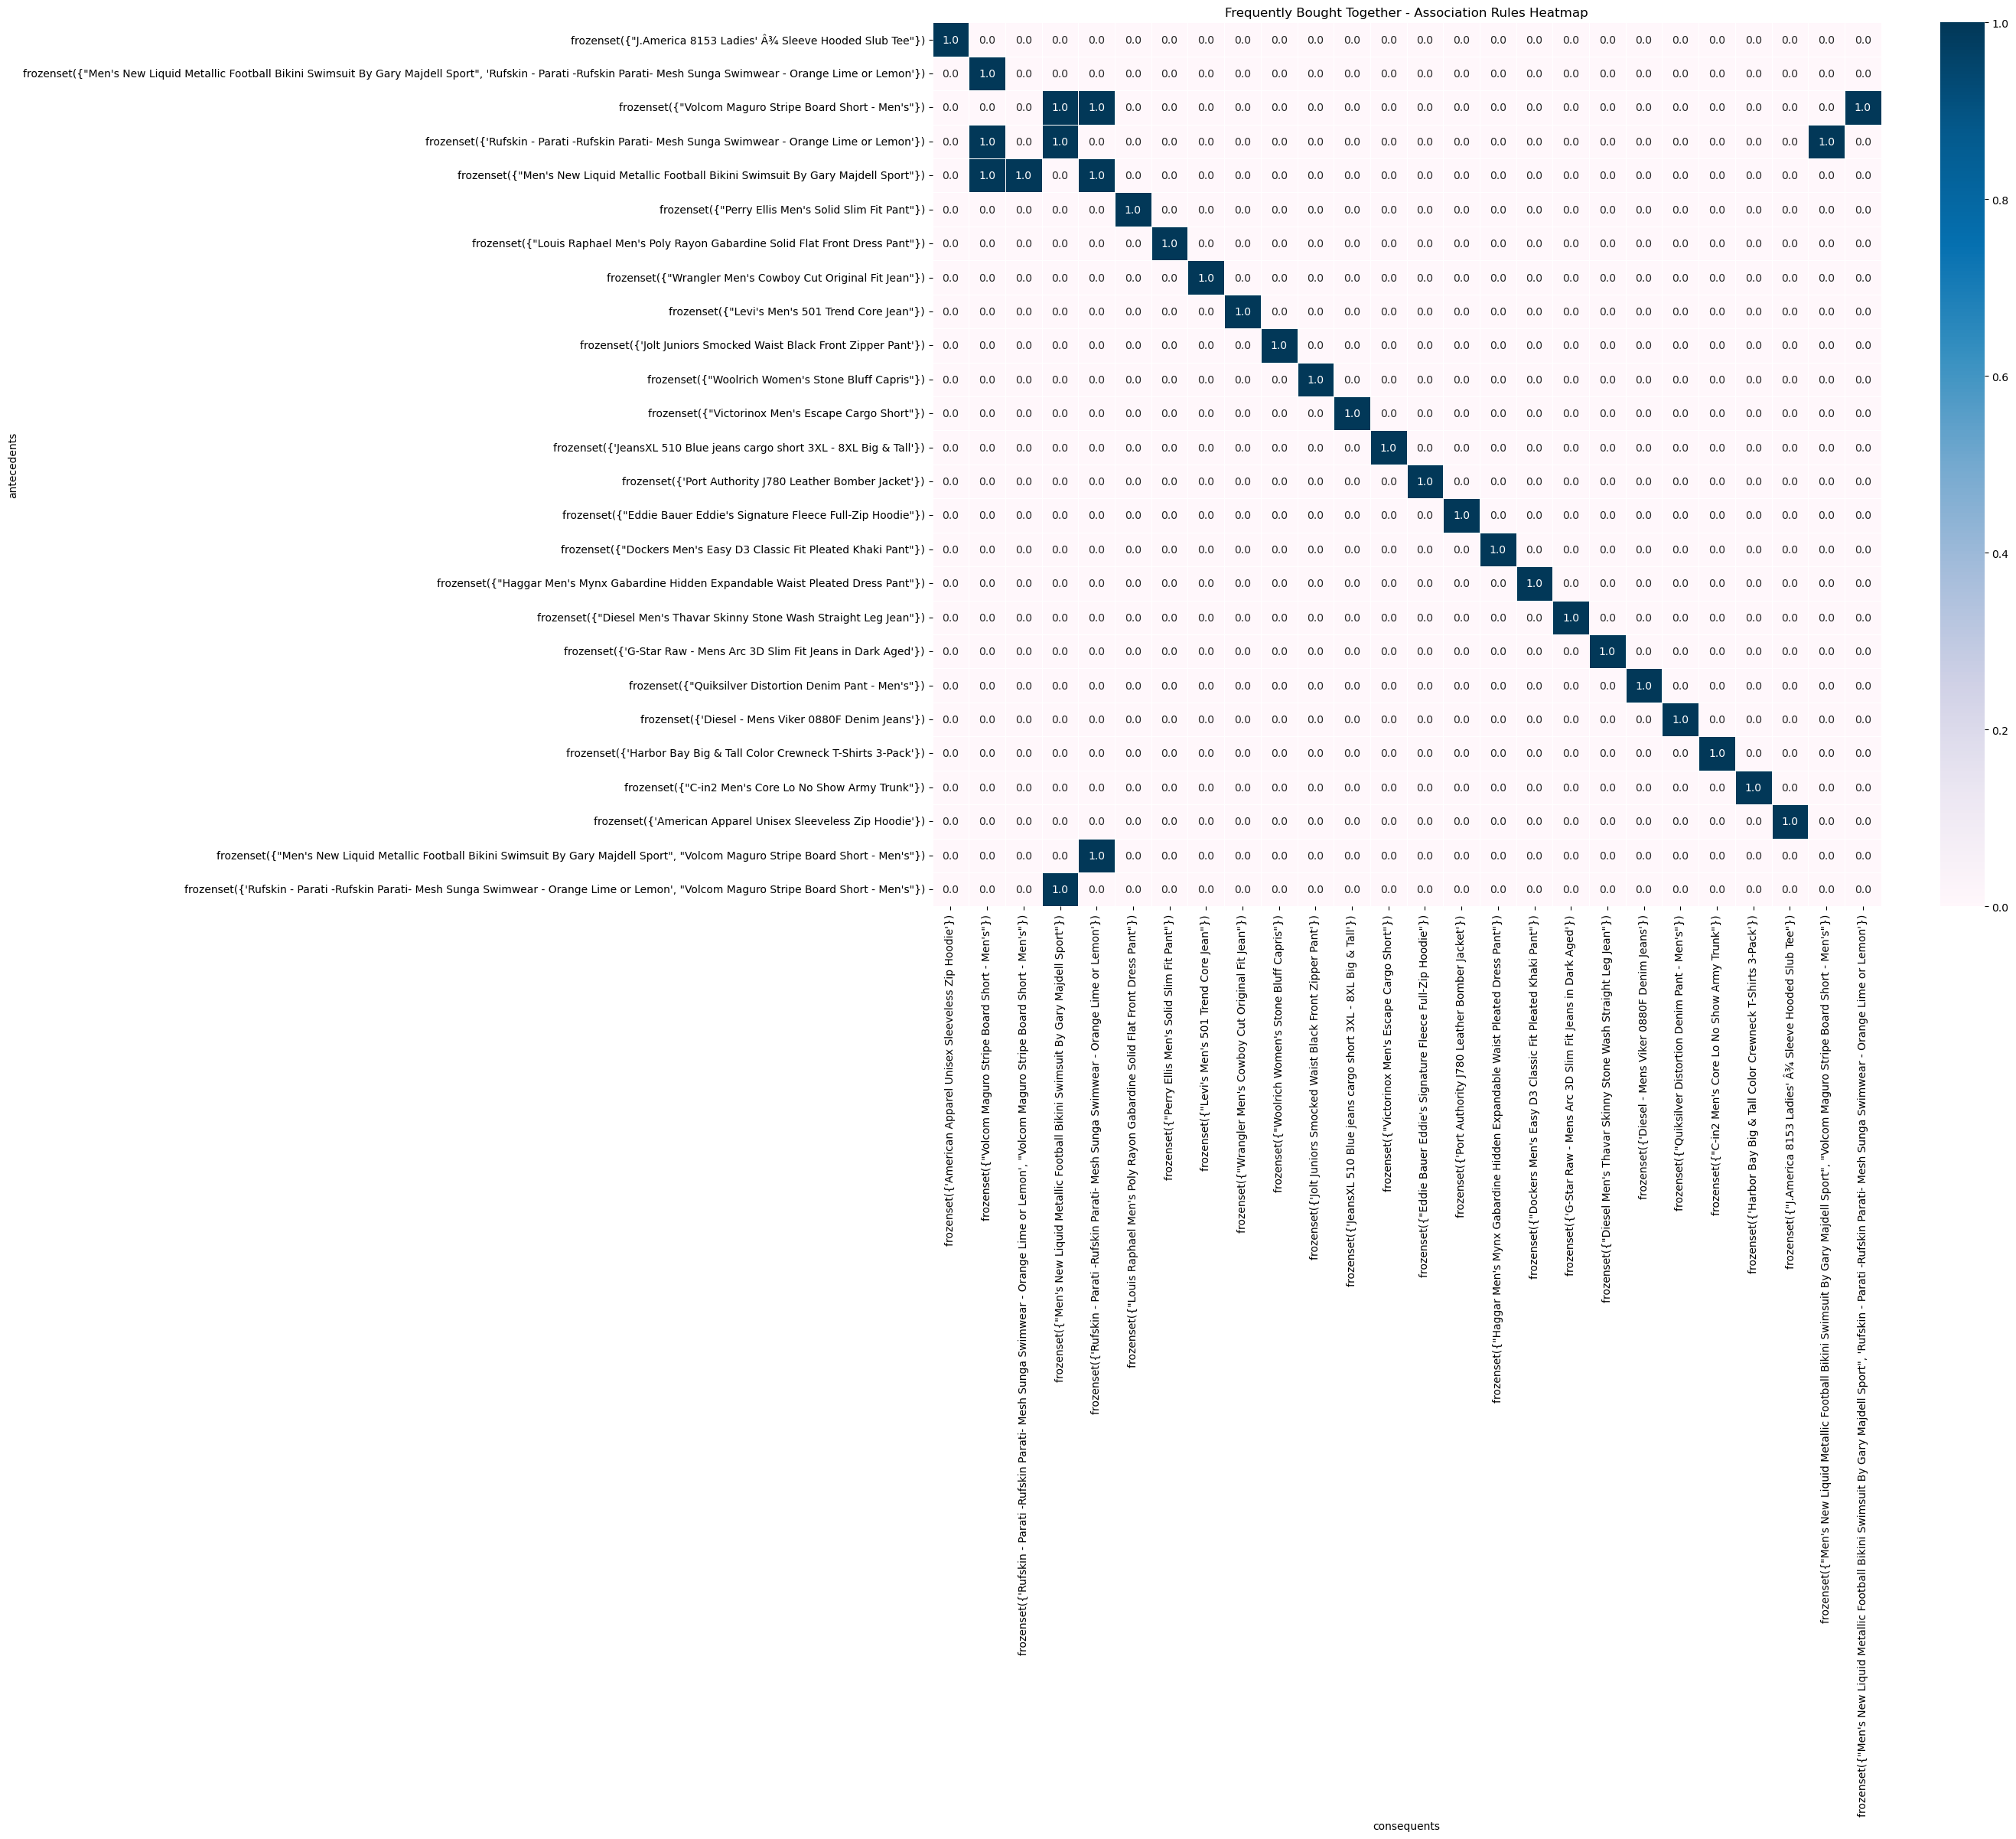

In [87]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

### Insights and  Recommendations

### Insights
#### High Confidence and Lift: All the association rules have a confidence of 1.0 and a lift of 896.0. This indicates that the consequent items are always purchased when the antecedent items are present, and they are extremely likely to occur together compared to what would be expected by chance alone.
#### Symmetrical Associations: Each rule has a pair of antecedents and consequents, and the rules are symmetrical. For example, rule 0 and rule 1 are essentially the same but with the antecedents and consequents reversed. This suggests a strong bidirectional association between the items involved.
#### Specific Product Associations: The rules provide insight into specific product associations. For example, the presence of "J.America 8153 Ladies' ¾ Sleeve Hooded Slub" is strongly associated with the presence of "American Apparel Unisex Sleeveless Zip Hoodie". Similarly, "C-in2 Men's Core Lo No Show Army Trunk" and "Harbor Bay Big & Tall Color Crewneck T-Shirts" are strongly associated with each other.

### Recommendations
#### Optimized Product Placement: Based on these associations, retailers can consider placing the associated products in close proximity to each other within their stores or online platforms. This can facilitate cross-selling and encourage customers to purchase complementary items together.
#### Targeted Marketing and Promotions: Retailers can use this information to design targeted marketing campaigns and promotions. For instance, if a customer purchases one of the associated products, they could be targeted with promotions or recommendations for the other associated product.
#### Inventory Management: Understanding these associations can also help in inventory management. Retailers can ensure that associated products are adequately stocked together to meet customer demand and prevent stockouts.
#### Customer Experience Enhancement: By offering associated products together or suggesting them as part of a bundle, retailers can enhance the overall customer experience and satisfaction.
#### Overall, leveraging association rules can provide valuable insights for retailers to optimize product placement, marketing strategies, and customer experience, ultimately leading to increased sales and customer satisfaction.